In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv",
    sep=',',
    header=0)

In [3]:
dataset.drop(columns='Name', inplace=True)

In [4]:
dataset.Pclass = dataset.Pclass.astype(str)

In [5]:
ohe = OneHotEncoder(sparse_output=False)
ohe_data = ohe.fit_transform(dataset.select_dtypes('O'))
ohe_df = pd.DataFrame(data=ohe_data, columns=ohe.get_feature_names_out())

In [6]:
dataset = pd.concat([dataset.select_dtypes(exclude='O'), ohe_df], axis=1)

In [7]:
X = dataset.drop(columns='Survived')
y = dataset.Survived
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.6,
                                                    random_state=42)

In [8]:
#Grid search

LR = LogisticRegression(max_iter=1000, solver='liblinear')

grid = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(0.01, 10, 100)
    }

f1_scorer = make_scorer(f1_score)

tuning_lr_grid = GridSearchCV(LR,
                             param_grid=grid,
                             scoring=f1_scorer,
                             n_jobs=1,
                             cv=8,
                             verbose=0)
tuning_lr_grid.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=1,
             param_grid={'C': array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2....
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, response_method='predict'))

In [9]:
print(tuning_lr_grid.best_params_)
best_grid = tuning_lr_grid.best_estimator_

{'C': 0.41363636363636364, 'penalty': 'l1'}


In [10]:
#Randomized search

dist = {
    'penalty': ['l1', 'l2'],
    'C': np.random.uniform(0.01, 10, 100)
    }

tuning_lr_rand = RandomizedSearchCV(LR,
                                    param_distributions=dist,
                                    scoring=f1_scorer,
                                    n_iter=200,
                                    n_jobs=1,
                                    cv=8,
                                    verbose=0)
tuning_lr_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=8,
                   estimator=LogisticRegression(max_iter=1000,
                                                solver='liblinear'),
                   n_iter=200, n_jobs=1,
                   param_distributions={'C': array([4.64185833, 3.73275686, 9.21628318, 9.08416748, 6.02830919,
       0.90823051, 4.58823175, 4.31035013, 6.84475065, 8.93216497,
       8.44704381, 2.41862297, 5.62489632, 3.96265433, 1.62274862,
       5.29423292, 9.48550573, 1.95964364, 5.57021405, 0....
       4.16255365, 3.19986274, 6.38365028, 0.31632566, 2.38333347,
       7.65861438, 0.67584779, 7.68436599, 5.4444074 , 9.43933617,
       5.90701972, 4.08381941, 3.3482708 , 9.62861156, 1.56384364,
       1.16102752, 6.10007136, 5.99389996, 0.64527543, 1.8409419 ,
       5.59459638, 0.29226709, 5.4408735 , 4.94015549, 9.93861601,
       4.58500158, 8.59643165, 7.91179261, 5.605566  , 3.5083039 ]),
                                        'penalty': ['l1', 'l2']},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [11]:
print(tuning_lr_rand.best_params_)
best_rand = tuning_lr_rand.best_estimator_

{'penalty': 'l1', 'C': 0.57319835428701}


In [12]:
#Depending on the values of hyperparameter C drawn in the randomized search, the optimal values of both
#hyperparameters in grid search and randomized search may differ significantly from each other, while the values of F1-score
#on the test set for both approaches are very similar

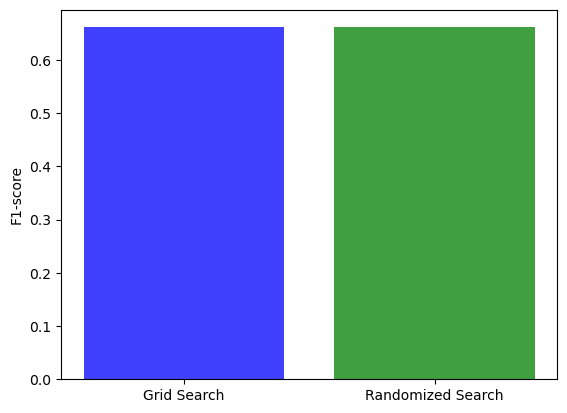

In [13]:
models = [best_grid, best_rand]
f1_score_test = [f1_score(y_test, m.predict(X_test)) for m in models]

plt.bar(['Grid Search', 'Randomized Search'],
        f1_score_test,
        color=['blue', 'green'],
        alpha=0.75)
plt.ylabel('F1-score');

In [14]:
print(f1_score_test)

[0.6612244897959184, 0.6612244897959184]
